EXPÉRIMENTATION : MÉTHODES DE GRADIENT POUR ROSENBROCK
Fonction test: f(x,y) = (1 − x)² + 100(y − x²)²
Point initial: x0 = [-1.5, 2.0]
Minimum global: [1, 1]

1. MÉTHODE DE PLUS PROFONDE DESCENTE
Calcul du pas optimal à chaque itération
Convergence en 10000 itérations pour ε=1e-5

Itérations sélectionnées:


,k,"f(xk,yk)","||∇f(xk,yk)||",x_k,y_k,s_k
0,0,12.500000,162.864975,-1.500000,2.000000,0.020934
1,1,0.555295,0.494218,1.744810,3.046713,0.001221
2,2,0.555145,0.736471,1.744995,3.046138,0.000550
3,3,0.554996,0.494147,1.744610,3.046014,0.001222
4,4,0.554847,0.736318,1.744795,3.045439,0.000550
5,5,0.554698,0.494077,1.744409,3.045315,0.001222
10,10,0.553953,0.735859,1.744194,3.043343,0.000551
20,20,0.552463,0.735091,1.743193,3.039849,0.000551
50,50,0.548000,0.732774,1.740185,3.029368,0.000553
100,100,0.540587,0.728903,1.735161,3.011903,0.000557



2. MÉTHODES DE GRADIENT À PAS FIXE
Comparaison de différents pas constants

Pas fixe = 0.001:
  → Convergence en 10000 itérations, f finale = 9.62e-05
  → Non convergence, ||∇f|| final = 0.008836

Pas fixe = 0.0005:
  → Convergence en 10000 itérations, f finale = 6.55e-03
  → Non convergence, ||∇f|| final = 0.077269

Pas fixe = 0.0001:
  → Convergence en 10000 itérations, f finale = 2.78e+00
  → Non convergence, ||∇f|| final = 2.000438

Pas fixe = 5e-05:
  → Convergence en 10000 itérations, f finale = 4.48e+00
  → Non convergence, ||∇f|| final = 1.730189

3. VISUALISATION 2D DES RÉSULTATS


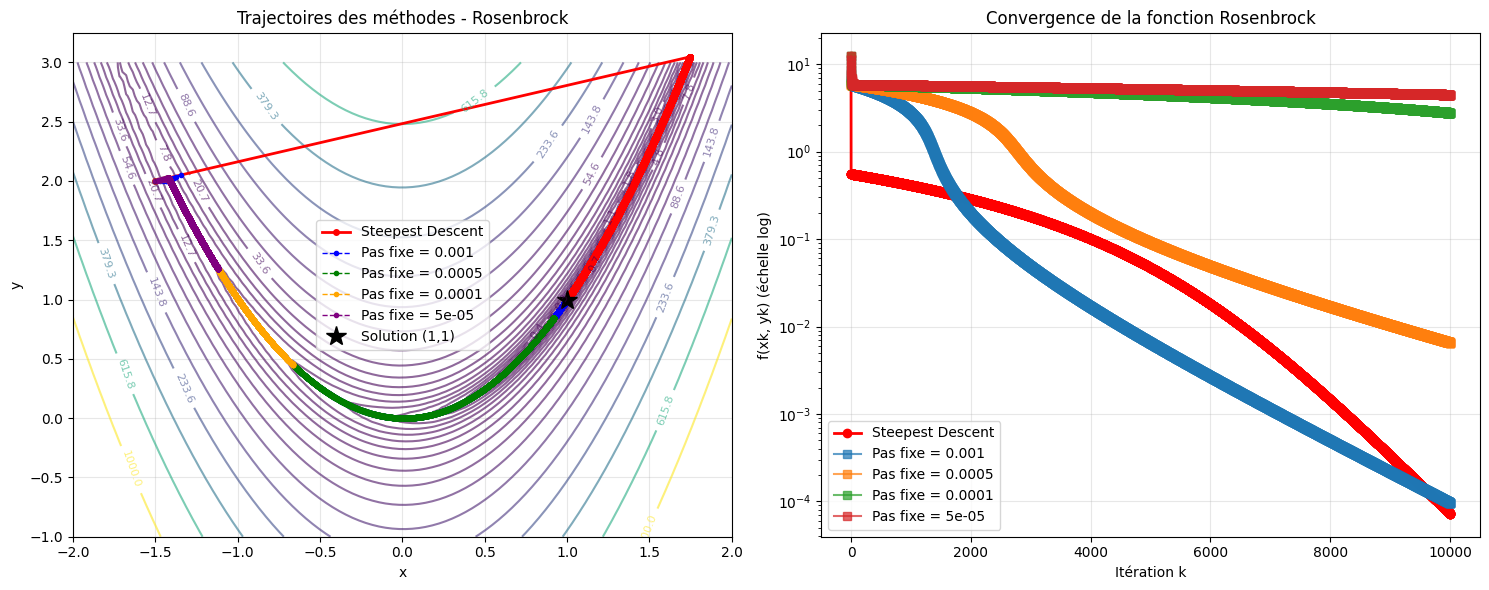


4. ANALYSE DÉTAILLÉE DE CONVERGENCE


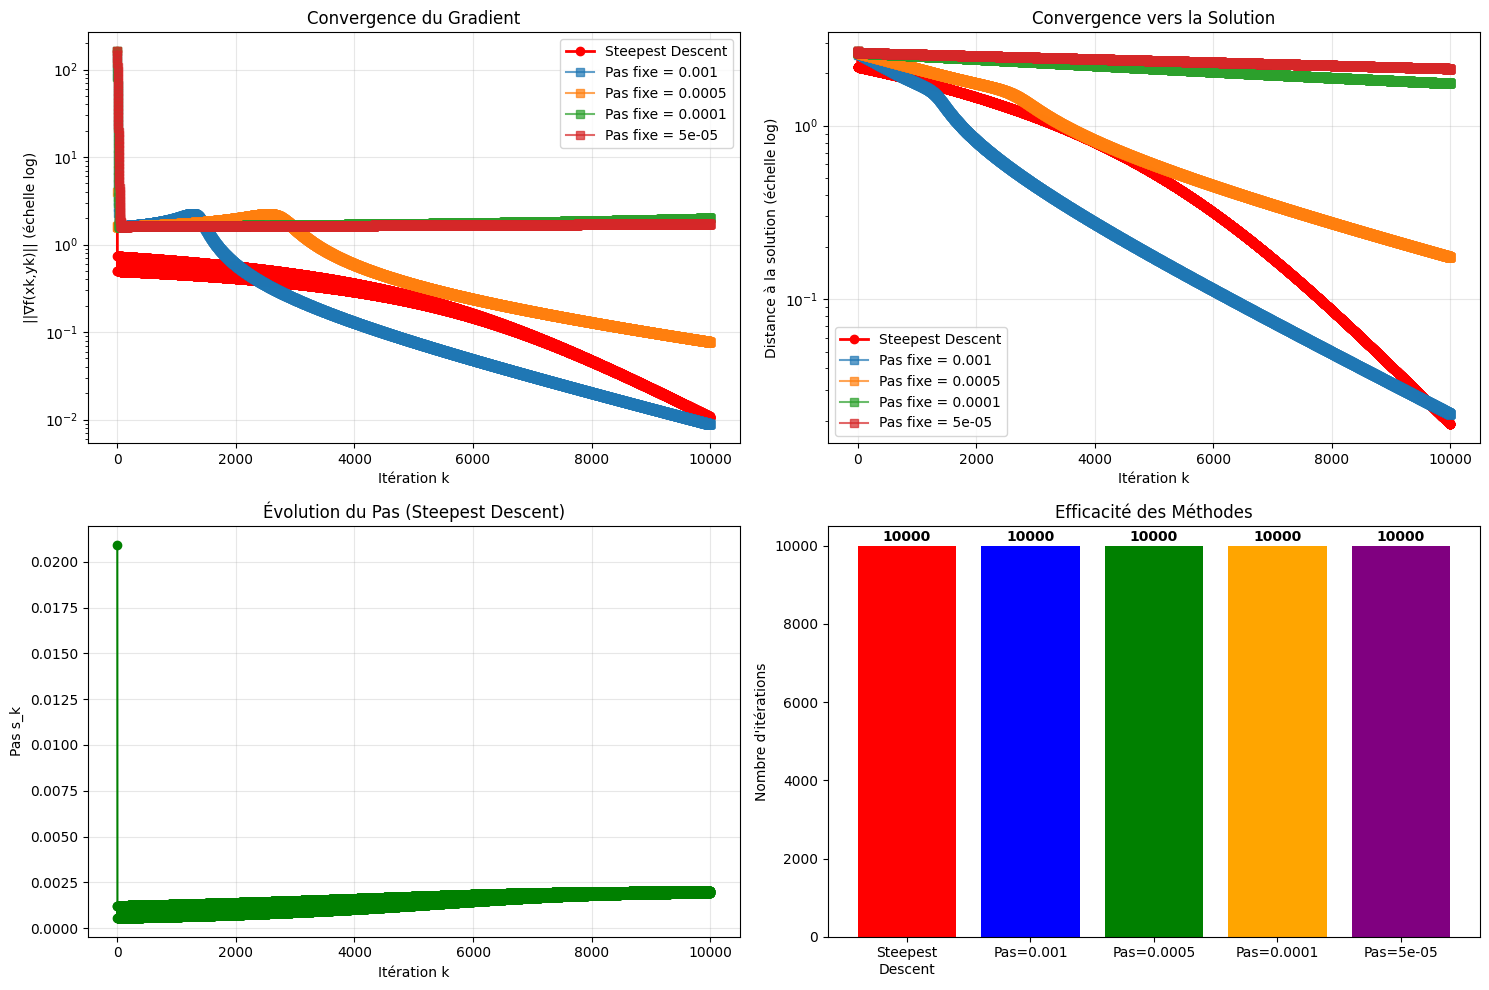

=== VÉRIFICATION DE L'ORTHOGONALITÉ ===
Produits scalaires entre gradients successifs:
Itération 0: ⟨∇f(x_0), ∇f(x_1)⟩ = 0.000057 (angle: 90.0°)
Itération 1: ⟨∇f(x_1), ∇f(x_2)⟩ = 0.000000 (angle: 90.0°)
Itération 2: ⟨∇f(x_2), ∇f(x_3)⟩ = -0.000000 (angle: 90.0°)
Itération 3: ⟨∇f(x_3), ∇f(x_4)⟩ = -0.000000 (angle: 90.0°)
Itération 4: ⟨∇f(x_4), ∇f(x_5)⟩ = -0.000000 (angle: 90.0°)
Itération 5: ⟨∇f(x_5), ∇f(x_6)⟩ = -0.000000 (angle: 90.0°)
Itération 6: ⟨∇f(x_6), ∇f(x_7)⟩ = 0.000000 (angle: 90.0°)
Itération 7: ⟨∇f(x_7), ∇f(x_8)⟩ = -0.000000 (angle: 90.0°)
Itération 8: ⟨∇f(x_8), ∇f(x_9)⟩ = -0.000001 (angle: 90.0°)
Itération 9: ⟨∇f(x_9), ∇f(x_10)⟩ = -0.000000 (angle: 90.0°)

Pour Rosenbrock, l'orthogonalité n'est pas parfaite mais les directions
restent généralement orthogonales dans les vallées étroites.

ANALYSE COMPARATIVE
Nombre d'itérations pour convergence à 1e-5 près:
------------------------------------------------------------


,Méthode,Itérations,f(x) final
0,Plus profonde descente,10000,0.000072
1,Pas fixe = 0.001,Divergence,0.000096
2,Pas fixe = 0.0005,Divergence,0.006548
3,Pas fixe = 0.0001,Divergence,2.782156
4,Pas fixe = 5e-05,Divergence,4.484946



OBSERVATIONS CLÉS POUR ROSENBROCK:
1. La fonction Rosenbrock est NOTOIREMENT DIFFICILE à optimiser
   à cause de sa vallée étroite et courbée
2. Comportement typique: descente rapide puis oscillations
   dans la vallée avant convergence lente
3. Le pas fixe doit être TRÈS PETIT pour Rosenbrock
4. La méthode à pas optimal est plus robuste mais très coûteuse
5. Rosenbrock montre les limites des méthodes de gradient simple


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple, List
import pandas as pd

class RosenbrockGradientDescent:
    """Classe pour reproduire les expérimentations avec la fonction Rosenbrock"""
    
    def __init__(self):
        # Fonction Rosenbrock : f(x,y) = (1 − x)² + 100(y − x²)²
        self.f = lambda x: (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
        self.grad_f = lambda x: np.array([
            -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2),
            200*(x[1] - x[0]**2)
        ])
        self.hessian_f = lambda x: np.array([
            [2 - 400*x[1] + 1200*x[0]**2, -400*x[0]],
            [-400*x[0], 200]
        ])
        
        # Point initial classique pour Rosenbrock
        self.x0 = np.array([-1.5, 2.0])
        self.solution = np.array([1.0, 1.0])  # Minimum global

    def steepest_descent_step(self, xk: np.ndarray) -> float:
        """
        Calcule un pas optimal par recherche linéaire pour Rosenbrock
        """
        grad = self.grad_f(xk)
        
        # Recherche linéaire par méthode de section dorée
        def phi(s):
            return self.f(xk - s * grad)
        
        # Intervalle de recherche
        a, b = 0, 0.1
        golden_ratio = (1 + np.sqrt(5)) / 2
        
        for _ in range(50):  # 50 itérations pour plus de précision
            s1 = b - (b - a) / golden_ratio
            s2 = a + (b - a) / golden_ratio
            
            if phi(s1) < phi(s2):
                b = s2
            else:
                a = s1
        
        return (a + b) / 2

    def steepest_descent(self, x0: np.ndarray = None, epsilon: float = 1e-5, max_iter: int = 10000) -> pd.DataFrame:
        """
        Implémente la méthode de plus profonde descente
        """
        if x0 is None:
            x0 = self.x0
            
        xk = x0.copy()
        iterations = []
        
        for k in range(max_iter):
            f_val = self.f(xk)
            grad_val = self.grad_f(xk)
            grad_norm = np.linalg.norm(grad_val)
            
            # Enregistrement de l'itération
            iterations.append({
                'k': k,
                'f(xk,yk)': f_val,
                '||∇f(xk,yk)||': grad_norm,
                'x_k': xk[0],
                'y_k': xk[1],
                'distance_solution': np.linalg.norm(xk - self.solution)
            })
            
            # Test d'arrêt
            if grad_norm < epsilon or f_val < 1e-10:
                break
            
            # Direction de descente
            dk = -grad_val
            
            # Pas optimal
            s_k = self.steepest_descent_step(xk)
            
            # Mise à jour
            xk = xk + s_k * dk
            
            # Enregistrement du pas
            if k > 0:
                iterations[k-1]['s_k'] = s_k_prev
            s_k_prev = s_k
        
        # Ajout du dernier pas
        if len(iterations) > 1:
            iterations[-2]['s_k'] = s_k_prev
        
        df = pd.DataFrame(iterations)
        return df

    def fixed_step_gradient(self, x0: np.ndarray = None, step_size: float = 0.001, 
                          epsilon: float = 1e-5, max_iter: int = 10000) -> pd.DataFrame:
        """
        Implémente la méthode de gradient à pas fixe
        """
        if x0 is None:
            x0 = self.x0
            
        xk = x0.copy()
        iterations = []
        
        for k in range(max_iter):
            f_val = self.f(xk)
            grad_val = self.grad_f(xk)
            grad_norm = np.linalg.norm(grad_val)
            
            iterations.append({
                'k': k,
                'f(xk,yk)': f_val,
                '||∇f(xk,yk)||': grad_norm,
                'x_k': xk[0],
                'y_k': xk[1],
                's_k': step_size,
                'distance_solution': np.linalg.norm(xk - self.solution)
            })
            
            # Test d'arrêt
            if grad_norm < epsilon or f_val < 1e-10:
                break
            
            # Mise à jour avec pas fixe
            xk = xk - step_size * grad_val
        
        return pd.DataFrame(iterations)

    def plot_trajectories_simple(self, steepest_df: pd.DataFrame, fixed_step_dfs: dict):
        """
        Version simplifiée sans 3D
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot 1: Trajectoire dans le plan
        # Création des contours
        x = np.linspace(-2, 2, 100)
        y = np.linspace(-1, 3, 100)
        X, Y = np.meshgrid(x, y)
        Z = np.array([self.f([xi, yi]) for xi, yi in zip(X.ravel(), Y.ravel())]).reshape(X.shape)
        
        # Contour plot
        contour_levels = np.logspace(-1, 3, 20)
        CS = ax1.contour(X, Y, Z, levels=contour_levels, cmap='viridis', alpha=0.6)
        plt.clabel(CS, inline=1, fontsize=8)
        
        # Trajectoires
        ax1.plot(steepest_df['x_k'], steepest_df['y_k'], 'ro-', 
                linewidth=2, markersize=4, label='Steepest Descent')
        
        colors = ['blue', 'green', 'orange', 'purple']
        for i, (step_size, df) in enumerate(fixed_step_dfs.items()):
            if len(df) > 0:
                ax1.plot(df['x_k'], df['y_k'], 
                        color=colors[i % len(colors)], marker='o', linestyle='--',
                        linewidth=1, markersize=3, label=f'Pas fixe = {step_size}')
        
        # Solution
        ax1.plot(self.solution[0], self.solution[1], 'k*', 
                markersize=15, label='Solution (1,1)')
        
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        ax1.set_title('Trajectoires des méthodes - Rosenbrock')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # Plot 2: Convergence
        ax2.semilogy(steepest_df['k'], steepest_df['f(xk,yk)'], 'ro-', 
                    label='Steepest Descent', linewidth=2)
        
        for step_size, df in fixed_step_dfs.items():
            if len(df) > 0:
                ax2.semilogy(df['k'], df['f(xk,yk)'], 's-', 
                           label=f'Pas fixe = {step_size}', alpha=0.7)
        
        ax2.set_xlabel('Itération k')
        ax2.set_ylabel('f(xk, yk) (échelle log)')
        ax2.set_title('Convergence de la fonction Rosenbrock')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()

    def plot_convergence_analysis(self, steepest_df: pd.DataFrame, fixed_step_dfs: dict):
        """
        Analyse détaillée de la convergence
        """
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
        
        # 1. Convergence du gradient
        ax1.semilogy(steepest_df['k'], steepest_df['||∇f(xk,yk)||'], 'ro-', 
                    label='Steepest Descent', linewidth=2)
        
        for step_size, df in fixed_step_dfs.items():
            if len(df) > 0:
                ax1.semilogy(df['k'], df['||∇f(xk,yk)||'], 's-', 
                           label=f'Pas fixe = {step_size}', alpha=0.7)
        
        ax1.set_xlabel('Itération k')
        ax1.set_ylabel('||∇f(xk,yk)|| (échelle log)')
        ax1.set_title('Convergence du Gradient')
        ax1.legend()
        ax1.grid(True, alpha=0.3)
        
        # 2. Distance à la solution
        ax2.semilogy(steepest_df['k'], steepest_df['distance_solution'], 'ro-', 
                    label='Steepest Descent', linewidth=2)
        
        for step_size, df in fixed_step_dfs.items():
            if len(df) > 0:
                ax2.semilogy(df['k'], df['distance_solution'], 's-', 
                           label=f'Pas fixe = {step_size}', alpha=0.7)
        
        ax2.set_xlabel('Itération k')
        ax2.set_ylabel('Distance à la solution (échelle log)')
        ax2.set_title('Convergence vers la Solution')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
        
        # 3. Évolution du pas (pour steepest descent)
        if 's_k' in steepest_df.columns:
            ax3.plot(steepest_df['k'][:-1], steepest_df['s_k'].dropna(), 'go-')
            ax3.set_xlabel('Itération k')
            ax3.set_ylabel('Pas s_k')
            ax3.set_title('Évolution du Pas (Steepest Descent)')
            ax3.grid(True, alpha=0.3)
        
        # 4. Comparaison d'efficacité
        methods = ['Steepest\nDescent']
        iterations = [len(steepest_df)]
        
        for step_size, df in fixed_step_dfs.items():
            methods.append(f'Pas={step_size}')
            iterations.append(len(df) if len(df) < 10000 else 10000)
        
        bars = ax4.bar(methods, iterations, 
                      color=['red', 'blue', 'green', 'orange', 'purple'][:len(methods)])
        ax4.set_ylabel('Nombre d\'itérations')
        ax4.set_title('Efficacité des Méthodes')
        
        for bar, val in zip(bars, iterations):
            ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50, 
                   str(val), ha='center', va='bottom', fontweight='bold')
        
        plt.tight_layout()
        plt.show()

    def verify_orthogonality(self, steepest_df: pd.DataFrame):
        """
        Vérifie l'orthogonalité des directions successives
        """
        print("=== VÉRIFICATION DE L'ORTHOGONALITÉ ===")
        print("Produits scalaires entre gradients successifs:")
        
        for i in range(min(10, len(steepest_df)-1)):
            if i+1 < len(steepest_df):
                xk = np.array([steepest_df.iloc[i]['x_k'], steepest_df.iloc[i]['y_k']])
                xk1 = np.array([steepest_df.iloc[i+1]['x_k'], steepest_df.iloc[i+1]['y_k']])
                
                grad_k = self.grad_f(xk)
                grad_k1 = self.grad_f(xk1)
                
                dot_product = np.dot(grad_k, grad_k1)
                angle_deg = np.degrees(np.arccos(np.clip(
                    dot_product / (np.linalg.norm(grad_k) * np.linalg.norm(grad_k1)), -1, 1
                )))
                
                print(f"Itération {i}: ⟨∇f(x_{i}), ∇f(x_{i+1})⟩ = {dot_product:.6f} (angle: {angle_deg:.1f}°)")
        
        print("\nPour Rosenbrock, l'orthogonalité n'est pas parfaite mais les directions")
        print("restent généralement orthogonales dans les vallées étroites.")


# Création des expérimentations
experiments = RosenbrockGradientDescent()

print("=" * 80)
print("EXPÉRIMENTATION : MÉTHODES DE GRADIENT POUR ROSENBROCK")
print("Fonction test: f(x,y) = (1 − x)² + 100(y − x²)²")
print("Point initial: x0 = [-1.5, 2.0]")
print("Minimum global: [1, 1]")
print("=" * 80)

# 1. Méthode de plus profonde descente
print("\n1. MÉTHODE DE PLUS PROFONDE DESCENTE")
print("Calcul du pas optimal à chaque itération")

steepest_results = experiments.steepest_descent(epsilon=1e-5)
print(f"Convergence en {len(steepest_results)} itérations pour ε=1e-5")

# Affichage des itérations importantes
print("\nItérations sélectionnées:")
display_cols = ['k', 'f(xk,yk)', '||∇f(xk,yk)||', 'x_k', 'y_k']
if 's_k' in steepest_results.columns:
    display_cols.append('s_k')

# Sélection d'itérations représentatives
indices_to_show = [0, 1, 2, 3, 4, 5]
additional_indices = [10, 20, 50, 100, 200, 500]
indices_to_show.extend([i for i in additional_indices if i < len(steepest_results)])
if len(steepest_results) > 10:
    indices_to_show.extend([len(steepest_results)-5, len(steepest_results)-1])

display(steepest_results.iloc[indices_to_show][display_cols])

# 2. Méthodes à pas fixe
print("\n2. MÉTHODES DE GRADIENT À PAS FIXE")
print("Comparaison de différents pas constants")

# Pas adaptés pour Rosenbrock (plus petits à cause de la raideur)
step_sizes = [0.001, 0.0005, 0.0001, 0.00005]
fixed_step_results = {}

for step in step_sizes:
    print(f"\nPas fixe = {step}:")
    results = experiments.fixed_step_gradient(step_size=step, epsilon=1e-5)
    fixed_step_results[step] = results
    final_f = results.iloc[-1]['f(xk,yk)'] if len(results) > 0 else float('inf')
    print(f"  → Convergence en {len(results)} itérations, f finale = {final_f:.2e}")
    
    if len(results) == 10000:  # max_iter atteint
        final_grad_norm = results.iloc[-1]['||∇f(xk,yk)||']
        print(f"  → Non convergence, ||∇f|| final = {final_grad_norm:.6f}")

# 3. Visualisation 3D des résultats
print("\n3. VISUALISATION 2D DES RÉSULTATS")
experiments.plot_trajectories_simple(steepest_results, fixed_step_results)

# 4. Analyse détaillée de convergence
print("\n4. ANALYSE DÉTAILLÉE DE CONVERGENCE")
experiments.plot_convergence_analysis(steepest_results, fixed_step_results)

# 5. Vérification de l'orthogonalité
experiments.verify_orthogonality(steepest_results)

# 6. Analyse comparative
print("\n" + "="*80)
print("ANALYSE COMPARATIVE")
print("Nombre d'itérations pour convergence à 1e-5 près:")
print("-" * 60)

comparison_data = []
comparison_data.append(("Plus profonde descente", len(steepest_results), steepest_results.iloc[-1]['f(xk,yk)']))

for step in step_sizes:
    df = fixed_step_results[step]
    if len(df) < 10000:  # Si convergence
        comparison_data.append((f"Pas fixe = {step}", len(df), df.iloc[-1]['f(xk,yk)']))
    else:
        comparison_data.append((f"Pas fixe = {step}", "Divergence", df.iloc[-1]['f(xk,yk)']))

comparison_df = pd.DataFrame(comparison_data, columns=["Méthode", "Itérations", "f(x) final"])
display(comparison_df)

print("\n" + "="*80)
print("OBSERVATIONS CLÉS POUR ROSENBROCK:")
print("1. La fonction Rosenbrock est NOTOIREMENT DIFFICILE à optimiser")
print("   à cause de sa vallée étroite et courbée")
print("2. Comportement typique: descente rapide puis oscillations")
print("   dans la vallée avant convergence lente")
print("3. Le pas fixe doit être TRÈS PETIT pour Rosenbrock")
print("4. La méthode à pas optimal est plus robuste mais très coûteuse")
print("5. Rosenbrock montre les limites des méthodes de gradient simple")